In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
path = 'photo\p0\\'

In [3]:
# mirror mask
img = cv2.imread(path+'s_p_mask.png')
img2 = cv2.flip(img,1,dst=None)
cv2.imwrite(path+'back_s_p_mask.png',img2)

True

In [4]:
# im = cv2.imread('kuli_mask.png')
im = cv2.imread(path+'back_s_p_mask.png')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,100,255,0)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

# im_smpl = cv2.imread('kuli_hmlSMPL.png')
im_smpl = cv2.imread(path+'back_hmlSMPL.png')
imgray_smpl = cv2.cvtColor(im_smpl,cv2.COLOR_BGR2GRAY)
ret_smpl,thresh_smpl = cv2.threshold(imgray_smpl,100,255,0)
contours_smpl, hierarchy_smpl = cv2.findContours(thresh_smpl,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

In [5]:
contours = np.array(contours[0])
contours = contours.reshape(len(contours),2)
print(len(contours[:,0]))
contours_smpl = np.array(contours_smpl[0])
contours_smpl = contours_smpl.reshape(len(contours_smpl),2)
print(len(contours_smpl[:,0]))

845
807


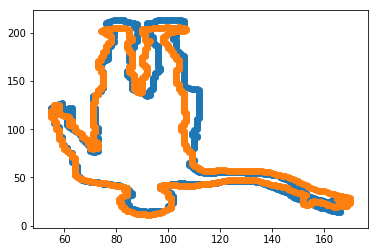

In [7]:
i=1300    
plt.scatter(contours[:i,0], contours[:i,1])
plt.scatter(contours_smpl[:i,0], contours_smpl[:i,1])
plt.show()

In [8]:
# np.save('contours.npy',contours )
# np.save('contours_smpl.npy',contours_smpl )
np.save(path+'back_small_contours.npy',contours )
np.save(path+'back_small_contours_smpl.npy',contours_smpl )

In [9]:
def get_contours(path):
    im = cv2.imread(path)
    imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(imgray,100,255,0)
    img, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    print( len(cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)))
    contours = np.array(contours[0])
    contours = contours.reshape(len(contours),2)
    return contours